In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv('Sales conversion.csv')

In [4]:
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [7]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [8]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

#### hence there are no null values

In [9]:
# remove duplicates 
df.drop_duplicates()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [10]:
df.shape

(1143, 11)

In [13]:
print(df.columns)

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')


In [ ]:
# 4. Data Distribution
# Plot distributions of numerical features
numerical_features = ['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# 5. Categorical Variables

# 6. Correlations

# 7. Clicks and Conversions Analysis







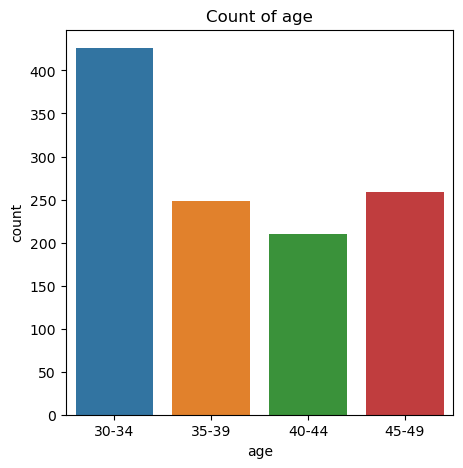

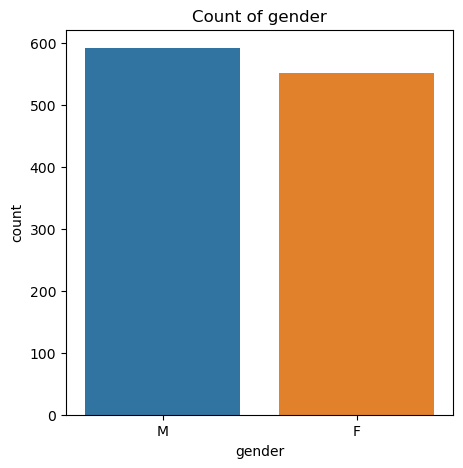

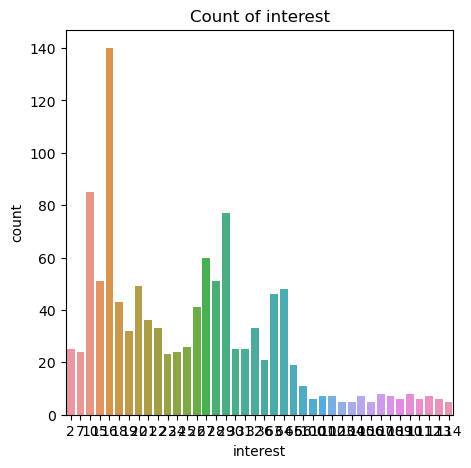

In [19]:
# Plot count plots for categorical features
categorical_features = ['age', 'gender', 'interest']
for feature in categorical_features:
    plt.figure(figsize=(5,5))
    sns.countplot(x=df[feature])
    plt.title(f'Count of {feature}')
    plt.show()


C:\Users\Bhuvan raju\AppData\Local\Temp\ipykernel_12672\1208021582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


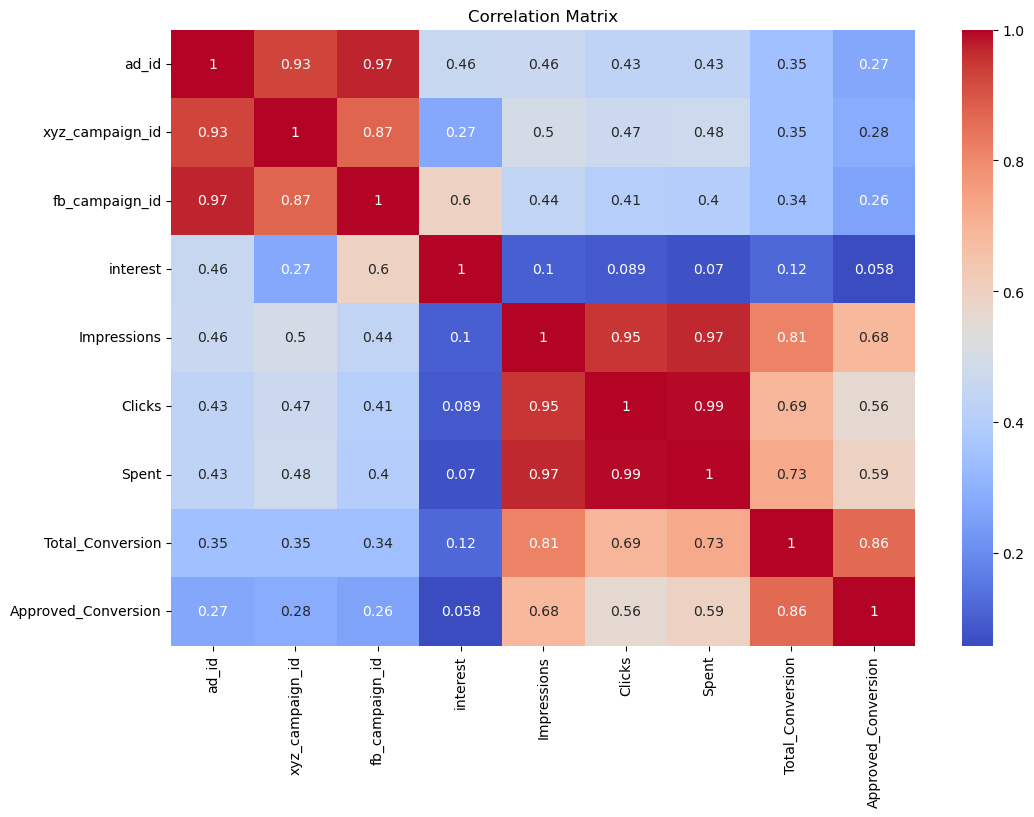

In [15]:
# Calculate and visualize correlations
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


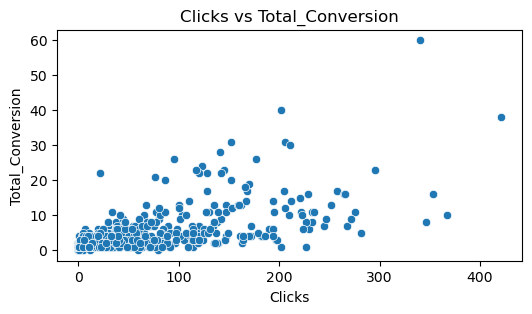

In [18]:
# Scatter plots to analyze relationships
plt.figure(figsize=(6, 3))
sns.scatterplot(data=df, x='Clicks', y='Total_Conversion')
plt.title('Clicks vs Total_Conversion')
plt.show()

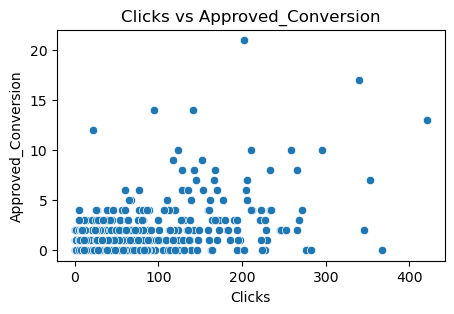

In [24]:

plt.figure(figsize=(5,3))
sns.scatterplot(data=df, x='Clicks', y='Approved_Conversion')
plt.title('Clicks vs Approved_Conversion')
plt.show()


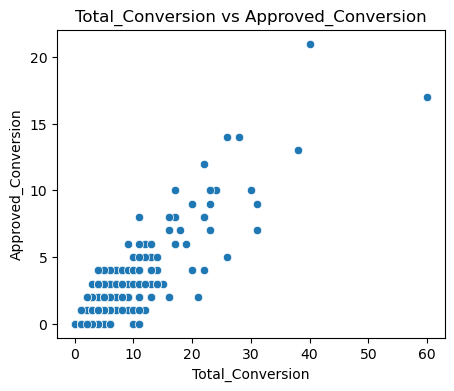

In [23]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x='Total_Conversion', y='Approved_Conversion')
plt.title('Total_Conversion vs Approved_Conversion')
plt.show()

In [25]:

# Additional Analysis: Click Through Rate (CTR) and Conversion Rate (CR)
df['CTR'] = df['Clicks'] / df['Impressions']
df['CR'] = df['Total_Conversion'] / df['Clicks']

print("\nSummary Statistics for CTR and CR:\n", df[['CTR', 'CR']].describe())


Summary Statistics for CTR and CR:
                CTR           CR
count  1143.000000  1140.000000
mean      0.000164          inf
std       0.000115          NaN
min       0.000000     0.000000
25%       0.000100     0.071429
50%       0.000160     0.199291
75%       0.000234     1.000000
max       0.001059          inf


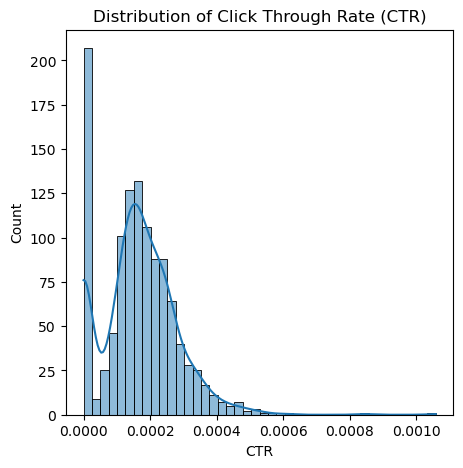

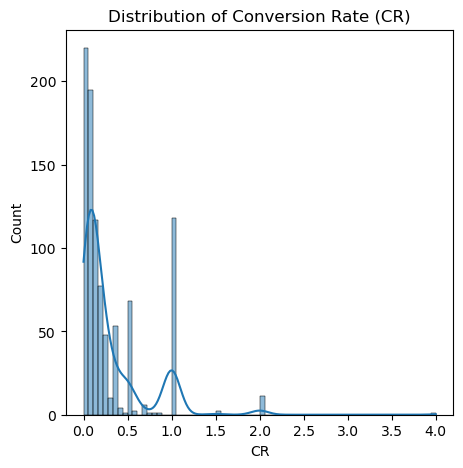

In [28]:


plt.figure(figsize=(5, 5))
sns.histplot(df['CTR'], kde=True)
plt.title('Distribution of Click Through Rate (CTR)')
plt.show()

plt.figure(figsize=(5, 5))
sns.histplot(df['CR'], kde=True)
plt.title('Distribution of Conversion Rate (CR)')
plt.show()